In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded, name="autoencoder")
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

batch_size = 64
autoencoder.fit(x_train, x_train, epochs=10, batch_size=batch_size, shuffle=True)

history = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - loss: 0.1347
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.0701
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.0676
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.0662
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.0653
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.0648
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - loss: 0.0642
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.0639
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.0635
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - loss: 0.0634
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.0631 - val_loss: 0.0626
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.0629 - val_loss: 0.0625
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.0630 - val_loss: 0.0625
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 3

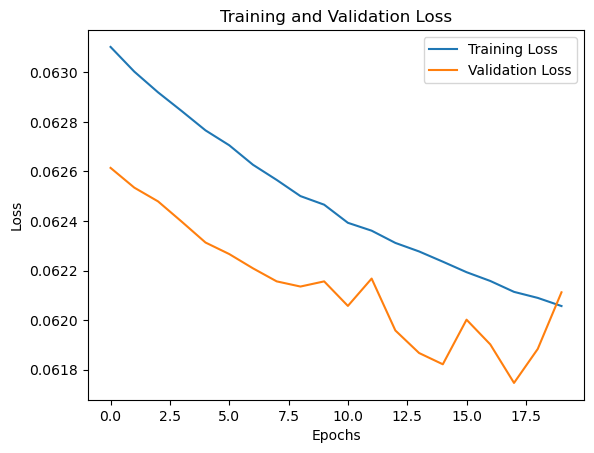

In [5]:
# Побудова графіку функції втрат на тренувальних і тестових даних
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


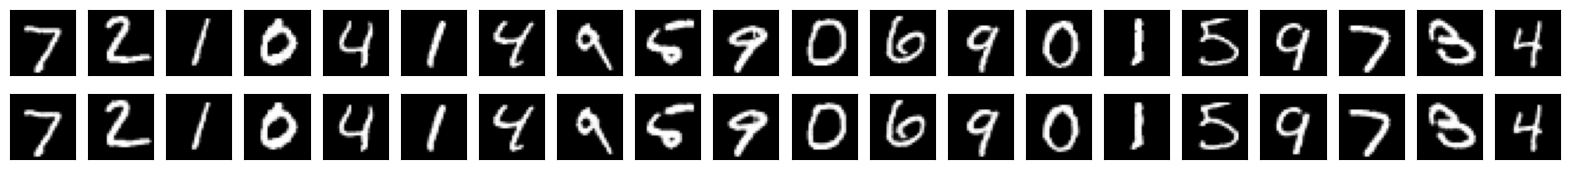

In [6]:
n = 20

imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

plt.figure(figsize=(n, 2))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax2 = plt.subplot(2, n, i + n + 1)
  plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)

plt.show()

def plot_digits(*images):
  images = [x.squeeze() for x in images]
  n = images[0].shape[0]  # число изображений

  plt.figure(figsize=(n, len(images)))
  for j in range(n):
    for i in range(len(images)):
      ax = plt.subplot(len(images), n, i * n + j + 1)
      plt.imshow(images[i][j])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()


def plot_homotopy(frm, to, n=20, autoencoder=None):
  z = np.zeros(([n] + list(frm.shape)))
  for i, t in enumerate(np.linspace(0., 1., n)):
    z[i] = frm * (1 - t) + to * t
  if autoencoder:
    plot_digits(autoencoder.predict(z, batch_size=n))
  else:
    plot_digits(z)

    